In [1]:
import pandas as pd
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
results_df = pd.read_csv('results_df_selector_3.csv')
results_df = results_df.drop('model_args', axis = 1)
results_df.loc[results_df['model_name'] == 'extremelyfastdecisiontreeclassifier', 'model_name'] = 'EFDT'
results_df.loc[results_df['model_name'] == 'hoeffdingtreeclassifier', 'model_name'] = 'HT'
results_df = results_df[(results_df['model_name'] == 'HT') | (results_df['model_name'] == 'EFDT')]

In [4]:
results_df

,model_name,drift_name,feature_selector_name,num_features,learning_threshold,iteration,accuracy,drifts_detected,ticker
400,HT,adwin,selectkbest,5,500,1,0.524,0,AAPL
401,HT,adwin,selectkbest,5,500,2,0.524,0,AAPL
402,HT,adwin,selectkbest,5,500,3,0.524,0,AAPL
403,HT,adwin,selectkbest,5,500,4,0.524,0,AAPL
404,HT,adwin,selectkbest,5,500,5,0.524,0,AAPL
...,...,...,...,...,...,...,...,...,...
795,EFDT,bollingerband,tstat,20,500,1,0.516,8,AAPL
796,EFDT,bollingerband,tstat,20,500,2,0.516,8,AAPL
797,EFDT,bollingerband,tstat,20,500,3,0.516,8,AAPL
798,EFDT,bollingerband,tstat,20,500,4,0.516,8,AAPL


In [5]:
results_df.sort_values(by = 'accuracy', ascending = False).head(10)

,model_name,drift_name,feature_selector_name,num_features,learning_threshold,iteration,accuracy,drifts_detected,ticker
593,HT,pagehinkley,tstat,20,500,4,0.526,1,AAPL
587,HT,kswin,tstat,20,500,3,0.526,5,AAPL
590,HT,pagehinkley,tstat,20,500,1,0.526,1,AAPL
591,HT,pagehinkley,tstat,20,500,2,0.526,1,AAPL
592,HT,pagehinkley,tstat,20,500,3,0.526,1,AAPL
594,HT,pagehinkley,tstat,20,500,5,0.526,1,AAPL
666,EFDT,kswin,tstat,7,500,2,0.525,2,AAPL
400,HT,adwin,selectkbest,5,500,1,0.524,0,AAPL
785,EFDT,kswin,tstat,20,500,1,0.524,1,AAPL
550,HT,pagehinkley,tstat,15,500,1,0.524,1,AAPL


In [8]:
results_df[['model_name', 'drift_name', 'feature_selector_name', 'num_features', 'accuracy']].groupby(['model_name', 'drift_name', 'feature_selector_name', 'num_features']).mean().sort_values(by = 'accuracy', ascending = False).head(10)

accuracy
model_name drift_name    feature_selector_name num_features          
HT         pagehinkley   tstat                 20               0.526
EFDT       pagehinkley   tstat                 10               0.524
HT         pagehinkley   tstat                 15               0.524
           adwin         selectkbest           5                0.524
           bollingerband selectkbest           15               0.523
                                               7                0.523
           adwin         tstat                 15               0.523
           pagehinkley   selectkbest           5                0.523
                                               15               0.523
EFDT       pagehinkley   tstat                 7                0.522

In [9]:
sqldf('''

select model_name
from results_df
group by model_name

''')

,model_name
0,EFDT
1,HT


### MODELS OVERVIEW

In [10]:
results_df['model_and_selector'] = results_df['model_name'] + ' + ' + results_df['feature_selector_name']
results_df['drift_and_selector'] = results_df['drift_name'] + ' + ' + results_df['feature_selector_name']

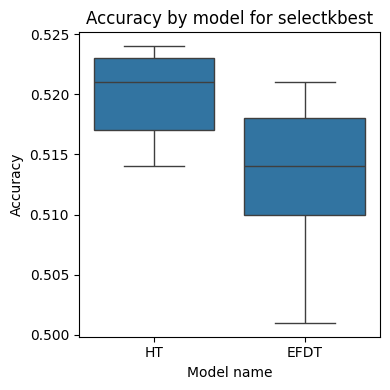

In [11]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='model_name', y="accuracy", data=results_df[results_df['feature_selector_name']=='selectkbest'])
plt.title("Accuracy by model for selectkbest")
plt.xlabel("Model name")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

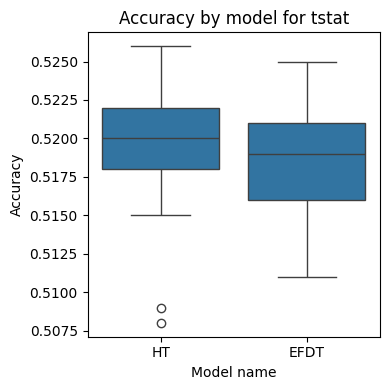

In [12]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='model_name', y="accuracy", data=results_df[results_df['feature_selector_name']=='tstat'])
plt.title("Accuracy by model for tstat")
plt.xlabel("Model name")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

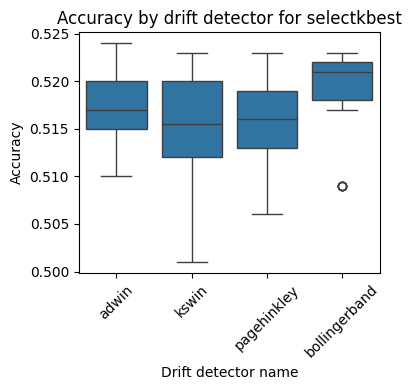

In [13]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='drift_name', y="accuracy", data=results_df[results_df['feature_selector_name']=='selectkbest'])
plt.title("Accuracy by drift detector for selectkbest")
plt.xticks(rotation=45)
plt.xlabel("Drift detector name")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

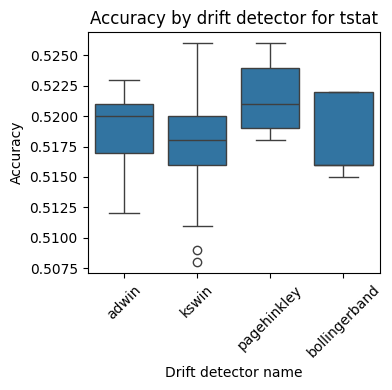

In [14]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='drift_name', y="accuracy", data=results_df[results_df['feature_selector_name']=='tstat'])
plt.title("Accuracy by drift detector for tstat")
plt.xticks(rotation=45)
plt.xlabel("Drift detector name")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

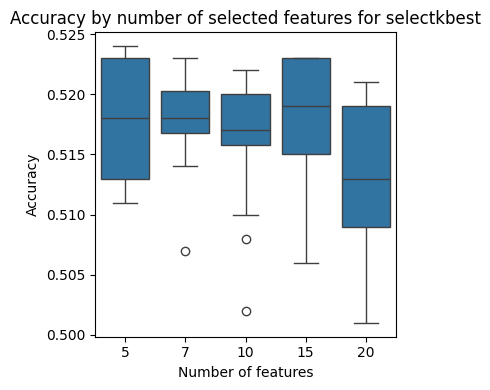

In [15]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='num_features', y="accuracy", data=results_df[results_df['feature_selector_name']=='selectkbest'])
plt.title("Accuracy by number of selected features for selectkbest")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

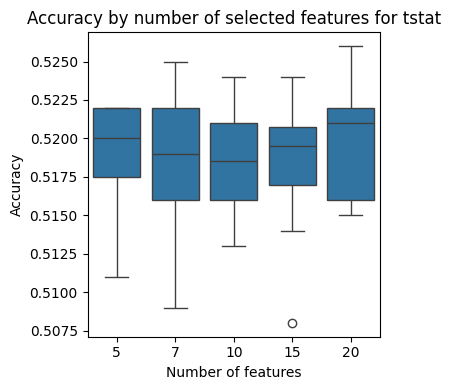

In [16]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='num_features', y="accuracy", data=results_df[results_df['feature_selector_name']=='tstat'])
plt.title("Accuracy by number of selected features for tstat")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()